In [22]:

import numpy as np
import random as rn 
import pandas as pd
import seaborn as sns


In [23]:
iris=pd.read_csv('iris.csv')

In [24]:
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [25]:
list(iris.columns)


['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [26]:
iris.iloc[0] #iloc -> wiersze #iris.iloc[0][0]?


sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

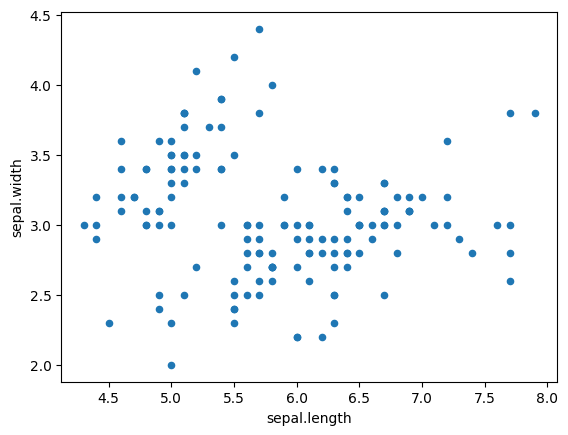

In [27]:
iris.plot(kind="scatter",x='sepal.length',y='sepal.width')


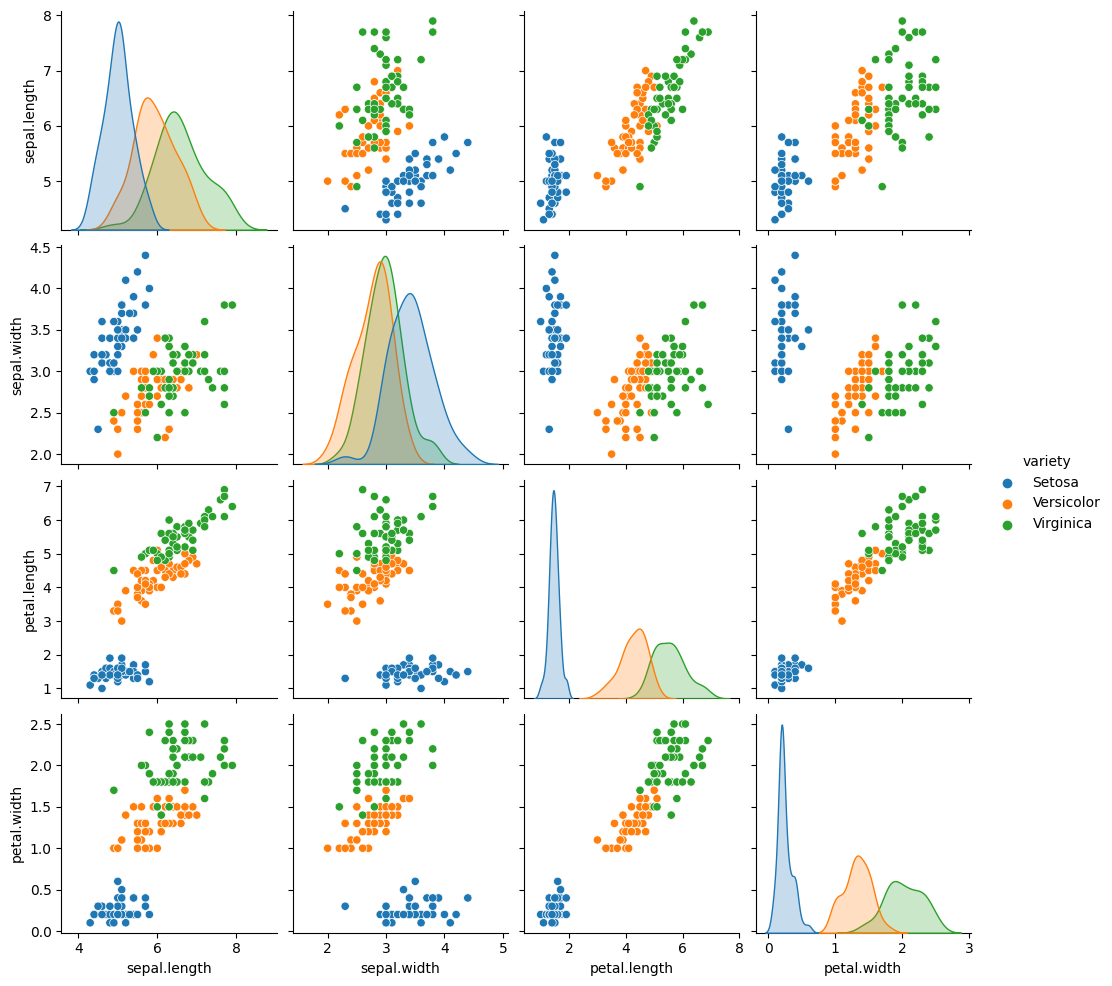

In [28]:
sns.pairplot(iris,hue="variety")

In [29]:
class DataProcessing:
    @staticmethod
    def shuffle(x):
        for i in range(len(x)-1,0,-1):
            j=rn.randint(0,i-1)
            x.iloc[i], x.iloc[j] = x.iloc[j], x.iloc[i]
    @staticmethod
    def normalization(x):
        #x' = (x-min)/(max-min)
        values = x.select_dtypes(exclude=["object"]) #kopia zbioru x bez nazw kwiatów
        columnNames=values.columns.tolist() #nazwy kolumn z atrybutami
        for column in columnNames:
            data = x.loc[:,column] #wszystkie rekordy z jednej z kolumn
            max1=max(data)
            min1=min(data)
            for row in x.index: #range(0, len(x),1):
                xprim=(x.at[row,column]-min1)/(max1-min1)
                x.at[row,column]=xprim


    @staticmethod
    def split(x,k): #k=0.7 -> 70% do zbioru treningowego, 30% testowy
        split_index=int(k*len(x))
        df1 = x[:split_index] #divide dataframe by rows
        df2 = x[split_index:]
        
        return df1, df2

In [30]:
DataProcessing.shuffle(iris)
DataProcessing.normalization(iris)


trainingSet, validatingSet = DataProcessing.split(iris,0.7)

In [31]:
# DataProcessing.normalization(trainingSet)
# DataProcessing.normalization(validatingSet)


display(trainingSet.head())
display(validatingSet.head())


sepal.length  sepal.width  petal.length  petal.width     variety
0      0.472222     0.291667      0.694915     0.625000  Versicolor
1      0.777778     0.416667      0.830508     0.833333   Virginica
2      0.305556     0.791667      0.050847     0.125000      Setosa
3      0.194444     0.583333      0.101695     0.125000      Setosa
4      0.694444     0.333333      0.644068     0.541667  Versicolor

sepal.length  sepal.width  petal.length  petal.width     variety
105      0.361111     0.208333      0.491525     0.416667  Versicolor
106      0.194444     0.000000      0.423729     0.375000  Versicolor
107      0.222222     0.625000      0.067797     0.083333      Setosa
108      0.166667     0.416667      0.067797     0.041667      Setosa
109      0.305556     0.416667      0.593220     0.583333  Versicolor

In [38]:
class KNN:
    @staticmethod
    def distance(v1, v2,m=2): #count distance from vector to vector by dist=(sum(vector1[i]-vector2[i])**m for i in vector1)**1/m (here m=2) 
        tmp=0
        for i in range(len(v1)):
            tmp += (v1[i]-v2[i])**m
        return tmp**(1/m) 
    @staticmethod
    def pick_most_occuring_variety(df_slice):
        # Count the frequency of each unique value in the "variety" column of the slice
        variety_counts = df_slice["variety"].value_counts()

        # Return the index of the maximum frequency count, which will be the most occurring variety
        most_occuring_variety = variety_counts.index[0]

        return most_occuring_variety
    @staticmethod
    def check_variety(trainingSet, validatingSet, k=-1 , m=2):
        training_vectors = trainingSet.select_dtypes(exclude=["object"]) #copy without the names of the flowers 
        validating_vectors = validatingSet.select_dtypes(exclude=["object"])

        for tested_vector, tested_index in zip(validating_vectors.values, validating_vectors.index):
            distances_from_tested_vector = []
            for training_vector in training_vectors.values:
                distances_from_tested_vector.append(KNN.distance(tested_vector, training_vector, m))
            
            #each vector from traininSet will have its distance in relation to vector from validatingSet recodred here
            df_with_distance = trainingSet.loc[:]   
            df_with_distance.loc[:,"distance"]=distances_from_tested_vector
            df_with_distance.sort_values(by="distance", inplace=True)
            if k==-1:
                k=len(validating_vectors.columns) + 1 # k= |{sepal.length, sepal.width, petal.length,	petal.width}| + 1 ilość cech + 1
            k_df = df_with_distance[:k]
            closest_variety=KNN.pick_most_occuring_variety(k_df)
            validating_vectors.at[tested_index, "variety"]=closest_variety
        return validating_vectors
    @staticmethod
    def calculate_positives(checked_vectors, validatingSet):
        positives = 0
        for tested_index in validatingSet.index:
                closest_variety = checked_vectors.at[tested_index, "variety"]
                true_variety = validatingSet.at[tested_index, "variety"]
                if(closest_variety == true_variety):
                    positives += 1
        return positives
    @staticmethod
    def calculate_accuracy(positives, validatingSet):
        acc=positives/len(validatingSet)
        return acc

In [39]:
#count distance betewen all vectors from validatingSet against any other from trainingSet and choose the closest one
checked_vectors = KNN.check_variety(trainingSet, validatingSet)

positives = KNN.calculate_positives(checked_vectors, validatingSet)

acc = KNN.calculate_accuracy(positives, validatingSet)
# display(positives, len(validatingSet))
display(acc)
    

-1

0.9333333333333333

In [40]:
#count distance betewen all vectors from validatingSet against any other from trainingSet and choose the closest one
checked_vectors = KNN.check_variety(trainingSet, validatingSet, k=2)

positives = KNN.calculate_positives(checked_vectors, validatingSet)

acc = KNN.calculate_accuracy(positives, validatingSet)
# display(positives, len(validatingSet))
display(acc)

2

0.9333333333333333

In [41]:
#count distance betewen all vectors from validatingSet against any other from trainingSet and choose the closest one
checked_vectors = KNN.check_variety(trainingSet, validatingSet, k=3)

positives = KNN.calculate_positives(checked_vectors, validatingSet)

acc = KNN.calculate_accuracy(positives, validatingSet)
# display(positives, len(validatingSet))
display(acc)

3

0.9333333333333333

In [42]:
#count distance betewen all vectors from validatingSet against any other from trainingSet and choose the closest one
checked_vectors = KNN.check_variety(trainingSet, validatingSet, k=4)

positives = KNN.calculate_positives(checked_vectors, validatingSet)

acc = KNN.calculate_accuracy(positives, validatingSet)
# display(positives, len(validatingSet))
display(acc)

4

0.9333333333333333

In [37]:
#todo: stage3: pick max variety value from k-element slice from sorted dateframe 
#check if returned variety equals variety in validatingSet
#count positives and determine accuracy: acc=positives/len(validatingSet)